# It is found that a few countries, that performed well in 2020 and 2021, are not doing well in 2022 (have more deaths in 2022, and even worse than many other countries that used to performed very poor. Can you demonstrate this situation based on Excess Deaths in the 3 years (2020, 2021, 2022)? 

In [24]:
import random
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime
from time import time
from os import getcwd
from os.path import join
%matplotlib inline


## Load Data

In [25]:
path = join(getcwd().rstrip('src'),
            'data/world_mortality.csv').replace('\\', '/')
DF = pd.read_csv(path)
# DF = pd.read_csv('~/AI/DATA/BigData/DeathBirthRate/world_mortality2015-20220214.csv')
DF.rename(columns={'country_name': 'country'}, inplace=True)
print(DF.head(10))


  iso3c  country  year  time time_unit  deaths
0   ALB  Albania  2015     1   monthly  2490.0
1   ALB  Albania  2015     2   monthly  2139.0
2   ALB  Albania  2015     3   monthly  2051.0
3   ALB  Albania  2015     4   monthly  1906.0
4   ALB  Albania  2015     5   monthly  1709.0
5   ALB  Albania  2015     6   monthly  1561.0
6   ALB  Albania  2015     7   monthly  2008.0
7   ALB  Albania  2015     8   monthly  1687.0
8   ALB  Albania  2015     9   monthly  1569.0
9   ALB  Albania  2015    10   monthly  1560.0


## Get progress last week

In [26]:
DF_Regular = DF[DF.year < 2020]
DF_2020 = DF[(DF.year == 2020)]
DF_2021 = DF[(DF.year == 2021)]
DF_2022 = DF[(DF.year == 2022)]

### 2015-2019 Data

In [27]:
Regular = DF_Regular.groupby('country').mean().reset_index()
Regular['AverageAnnualUnitCount'] = round(Regular.time * 2 - 1, 0)
Regular.head()

,country,year,time,deaths,AverageAnnualUnitCount
0,Albania,2017.0,6.5,1829.650000,12.0
1,Algeria,2018.5,6.5,14940.804167,12.0
2,Andorra,2017.0,6.5,25.850000,12.0
3,Antigua and Barbuda,2017.0,6.5,47.550000,12.0
4,Argentina,2017.0,6.5,28449.050000,12.0


In [28]:
import copy as copy
tmp = copy.copy(DF)
time_unit_dict = {'monthly': 12, 'weekly': 52}
tmp['AnnualUnitCount'] = [time_unit_dict[x] for x in tmp.time_unit]
tmp = tmp.groupby('country').mean().reset_index()[
    ['country', 'AnnualUnitCount']]
tmp.head()


,country,AnnualUnitCount
0,Albania,12.0
1,Algeria,12.0
2,Andorra,12.0
3,Antigua and Barbuda,12.0
4,Argentina,12.0


In [29]:
Regular = pd.merge(Regular, tmp, on='country')
Regular['deaths'] = Regular.deaths * Regular.AnnualUnitCount
Regular = Regular[['country', 'deaths', 'AverageAnnualUnitCount']]
Regular.head()


,country,deaths,AverageAnnualUnitCount
0,Albania,21955.80,12.0
1,Algeria,179289.65,12.0
2,Andorra,310.20,12.0
3,Antigua and Barbuda,570.60,12.0
4,Argentina,341388.60,12.0


### 2020 Data

In [30]:
DF_2020 = DF_2020.groupby('country').mean().reset_index()
DF_2020['AverageAnnualUnitCount'] = round(DF_2020.time * 2 - 1, 0)
DF_2020 = pd.merge(DF_2020, tmp, on='country')
DF_2020['deaths'] = DF_2020.deaths * DF_2020.AnnualUnitCount
DF_2020 = DF_2020[['country', 'deaths', 'AverageAnnualUnitCount']]
DF_2020.head()


,country,deaths,AverageAnnualUnitCount
0,Albania,27605.0,12.0
1,Algeria,235628.0,12.0
2,Andorra,419.0,12.0
3,Antigua and Barbuda,574.0,12.0
4,Argentina,376221.0,12.0


### 2021 Data

In [31]:
DF_2021 = DF_2021.groupby('country').mean().reset_index()
DF_2021['AverageAnnualUnitCount'] = round(DF_2021.time * 2 - 1, 0)
DF_2021 = pd.merge(DF_2021, tmp, on='country')
DF_2021['deaths'] = DF_2021.deaths * DF_2021.AnnualUnitCount
DF_2021 = DF_2021[['country', 'deaths', 'AverageAnnualUnitCount']]
DF_2021.head()


,country,deaths,AverageAnnualUnitCount
0,Albania,30580.0,12.0
1,Antigua and Barbuda,649.0,12.0
2,Armenia,34638.0,12.0
3,Aruba,964.0,12.0
4,Australia,170960.0,52.0


### 2022 Data

In [32]:
DF_2022 = DF_2022.groupby('country').mean().reset_index()
DF_2022['AverageAnnualUnitCount'] = round(DF_2022.time * 2 - 1, 0)
DF_2022 = pd.merge(DF_2022, tmp, on='country')
DF_2022['deaths'] = DF_2022.deaths * DF_2022.AnnualUnitCount
DF_2022 = DF_2022[['country', 'deaths', 'AverageAnnualUnitCount']]
DF_2022.head()


,country,deaths,AverageAnnualUnitCount
0,Albania,25708.000000,6.0
1,Armenia,27462.666667,9.0
2,Australia,190732.533333,30.0
3,Austria,89276.571429,42.0
4,Azerbaijan,62637.000000,8.0


### Merge Data

#### Death Count Year

In [33]:
newDF = pd.concat([Regular, DF_2020[['deaths']], DF_2021[['deaths']], DF_2022[['deaths']]], axis=1)
newDF.columns = ['country', 'RegularDeaths', 'RegularAverageAnnualUnitCount', '2020Deaths', '2021Deaths', '2022Deaths']
newDF = newDF.reindex(['country', 'RegularAverageAnnualUnitCount', 'RegularDeaths',
              '2020Deaths', '2021Deaths', '2022Deaths'], axis='columns')
newDF.head()

,country,RegularAverageAnnualUnitCount,RegularDeaths,2020Deaths,2021Deaths,2022Deaths
0,Albania,12.0,21955.80,27605.0,30580.0,25708.000000
1,Algeria,12.0,179289.65,235628.0,649.0,27462.666667
2,Andorra,12.0,310.20,419.0,34638.0,190732.533333
3,Antigua and Barbuda,12.0,570.60,574.0,964.0,89276.571429
4,Argentina,12.0,341388.60,376221.0,170960.0,62637.000000


#### Excess Death Per Year

In [34]:
EXD2020 = newDF['2020Deaths'] - newDF['RegularDeaths']
EXD2020.rename('EXD2020', inplace=True)
EXD2021 = newDF['2021Deaths'] - newDF['RegularDeaths']
EXD2021.rename('EXD2021', inplace=True)
EXD2022 = newDF['2022Deaths'] - newDF['RegularDeaths']
EXD2022.rename('EXD2022', inplace=True)
newDF = pd.concat([newDF, EXD2020, EXD2021, EXD2022], axis=1)
newDF.rename(columns={'RegularAverageAnnualUnitCount': 'RAAUC'}, inplace=True)
newDF.head()


,country,RAAUC,RegularDeaths,2020Deaths,2021Deaths,2022Deaths,EXD2020,EXD2021,EXD2022
0,Albania,12.0,21955.80,27605.0,30580.0,25708.000000,5649.20,8624.20,3752.200000
1,Algeria,12.0,179289.65,235628.0,649.0,27462.666667,56338.35,-178640.65,-151826.983333
2,Andorra,12.0,310.20,419.0,34638.0,190732.533333,108.80,34327.80,190422.333333
3,Antigua and Barbuda,12.0,570.60,574.0,964.0,89276.571429,3.40,393.40,88705.971429
4,Argentina,12.0,341388.60,376221.0,170960.0,62637.000000,34832.40,-170428.60,-278751.600000


#### Merge with OWID Data

In [35]:
path = join(getcwd().rstrip('src'),
            'data/owid-covid-data.csv').replace('\\', '/')
data = pd.read_csv(path)
data = data[['location', 'population']]
data.rename(columns={'location': 'country'}, inplace=True)
data.groupby('country').count().sort_values(by='population', ascending=False)
data.drop_duplicates(subset=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()


,country,population
0,Afghanistan,4.009946e+07
1,Africa,1.392394e+09
2,Albania,2.854710e+06
3,Algeria,4.417797e+07
4,Andorra,7.903400e+04


In [36]:
con1 = list(data.country)
con2 = list(newDF.country)
pop = []
for c in con2:
    if c in con1:
        pop.append(data[data.country == c].population.values[0])
    else:
        pop.append(0)
pop = pd.Series(pop, name='population')
newDF = pd.concat([newDF, pop], axis=1)
newDF.head()


,country,RAAUC,RegularDeaths,2020Deaths,2021Deaths,2022Deaths,EXD2020,EXD2021,EXD2022,population
0,Albania,12.0,21955.80,27605.0,30580.0,25708.000000,5649.20,8624.20,3752.200000,2854710.0
1,Algeria,12.0,179289.65,235628.0,649.0,27462.666667,56338.35,-178640.65,-151826.983333,44177969.0
2,Andorra,12.0,310.20,419.0,34638.0,190732.533333,108.80,34327.80,190422.333333,79034.0
3,Antigua and Barbuda,12.0,570.60,574.0,964.0,89276.571429,3.40,393.40,88705.971429,93220.0
4,Argentina,12.0,341388.60,376221.0,170960.0,62637.000000,34832.40,-170428.60,-278751.600000,45276780.0


#### Excess Death in Percentage

In [37]:
RDPP = newDF['RegularDeaths'] / newDF['population']
RDPP.rename('RDBP', inplace=True) # Regular Deaths by Population Percentage
IRDPP2020 = newDF['2020Deaths'] / newDF['population']
IRDPP2020.rename('IRDPP2020', inplace=True) # Irregular Deaths by Population in Percentage in 2020
IRDPP2021 = newDF['2021Deaths'] / newDF['population']
IRDPP2021.rename('IRDPP2021', inplace=True) # Irregular Deaths by Population in Percentage in 2021
IRDPP2022 = newDF['2022Deaths'] / newDF['population']
IRDPP2022.rename('IRDPP2022', inplace=True) # Irregular Deaths by Population in Percentage in 2022
EDPP2020 = newDF['EXD2020'] / newDF['population']
EDPP2020.rename('EDPP2020', inplace=True) # Excess Deaths by Population in Percentage in 2020
EDPP2021 = newDF['EXD2021'] / newDF['population']
EDPP2021.rename('EDPP2021', inplace=True) # Excess Deaths by Population in Percentage in 2021
EDPP2022 = newDF['EXD2022'] / newDF['population']
EDPP2022.rename('EDPP2022', inplace=True) # Excess Deaths by Population in Percentage in 2022
newDF = pd.concat([newDF, RDPP, IRDPP2020, IRDPP2021, IRDPP2022, EDPP2020, EDPP2021, EDPP2022], axis=1)
newDF.head()


,country,RAAUC,RegularDeaths,2020Deaths,2021Deaths,2022Deaths,EXD2020,EXD2021,EXD2022,population,RDBP,IRDPP2020,IRDPP2021,IRDPP2022,EDPP2020,EDPP2021,EDPP2022
0,Albania,12.0,21955.80,27605.0,30580.0,25708.000000,5649.20,8624.20,3752.200000,2854710.0,0.007691,0.009670,0.010712,0.009005,0.001979,0.003021,0.001314
1,Algeria,12.0,179289.65,235628.0,649.0,27462.666667,56338.35,-178640.65,-151826.983333,44177969.0,0.004058,0.005334,0.000015,0.000622,0.001275,-0.004044,-0.003437
2,Andorra,12.0,310.20,419.0,34638.0,190732.533333,108.80,34327.80,190422.333333,79034.0,0.003925,0.005302,0.438267,2.413297,0.001377,0.434342,2.409372
3,Antigua and Barbuda,12.0,570.60,574.0,964.0,89276.571429,3.40,393.40,88705.971429,93220.0,0.006121,0.006157,0.010341,0.957698,0.000036,0.004220,0.951577
4,Argentina,12.0,341388.60,376221.0,170960.0,62637.000000,34832.40,-170428.60,-278751.600000,45276780.0,0.007540,0.008309,0.003776,0.001383,0.000769,-0.003764,-0.006157


In [39]:
newDF.to_csv(join(getcwd().rstrip('src'),
                  'data/bd_w12_hw/COVID_small_flat_table.csv').replace('\\', '/'), sep=';', index=False)


## Demonstrate excess death changes in the range of 2020 to 2022

### Irregular Deaths by Population in Percentage

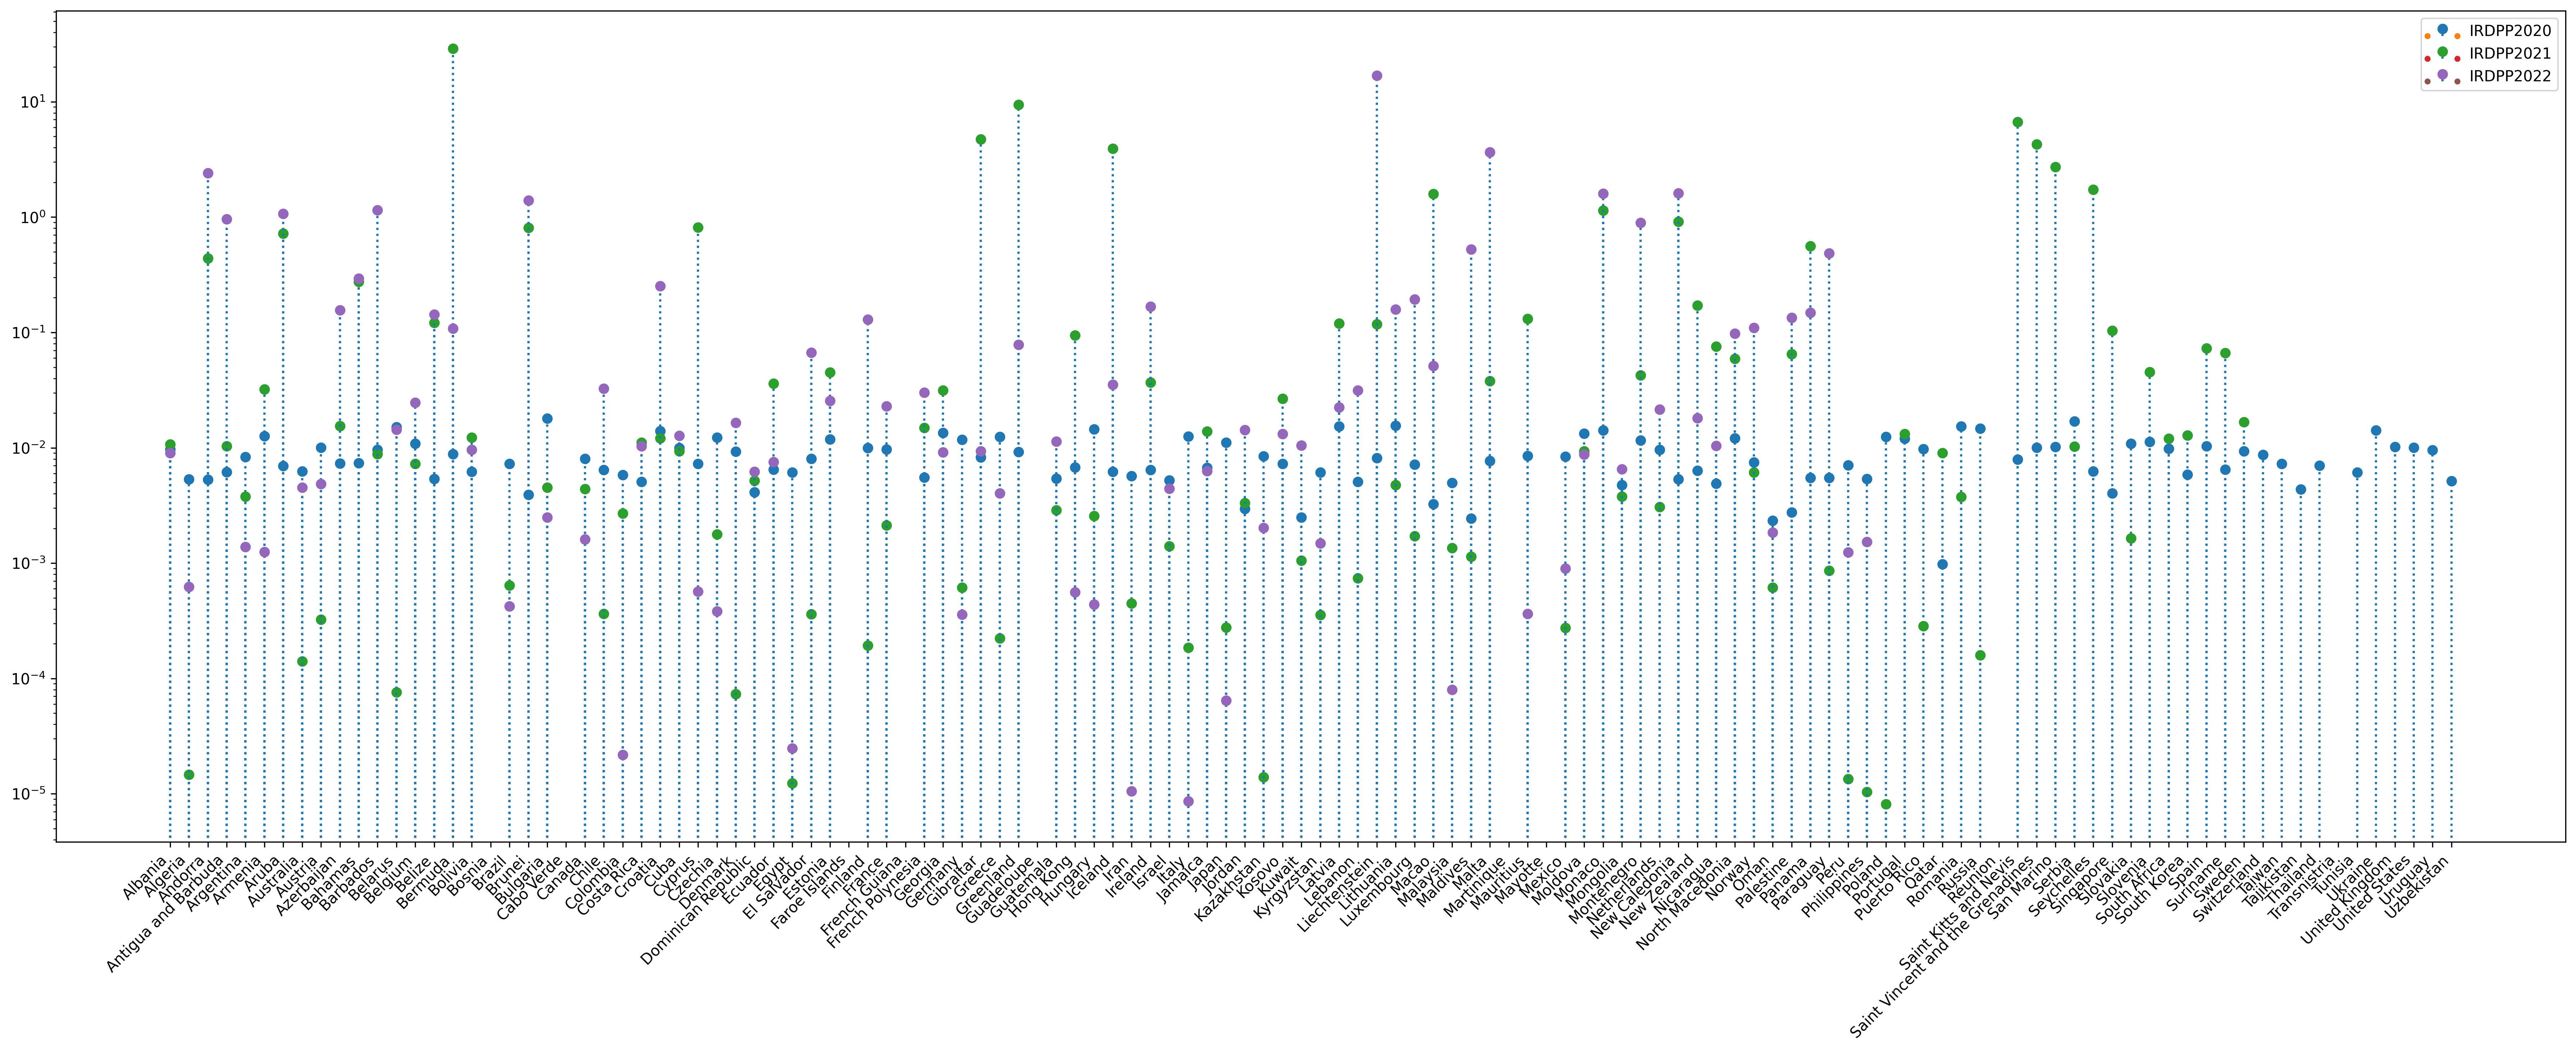

In [59]:
plt.figure(figsize=(30, 10), dpi=300)
plt.stem(newDF.country, newDF.IRDPP2020, 'r', linefmt=':', markerfmt='o', basefmt='.', label='IRDPP2020')
plt.stem(newDF.country, newDF.IRDPP2021, 'g', linefmt=':', markerfmt='o', basefmt='.', label='IRDPP2021')
plt.stem(newDF.country, newDF.IRDPP2022, 'b', linefmt=':', markerfmt='o', basefmt='.', label='IRDPP2022')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.show()


### Excess Deaths by Population in Percentage

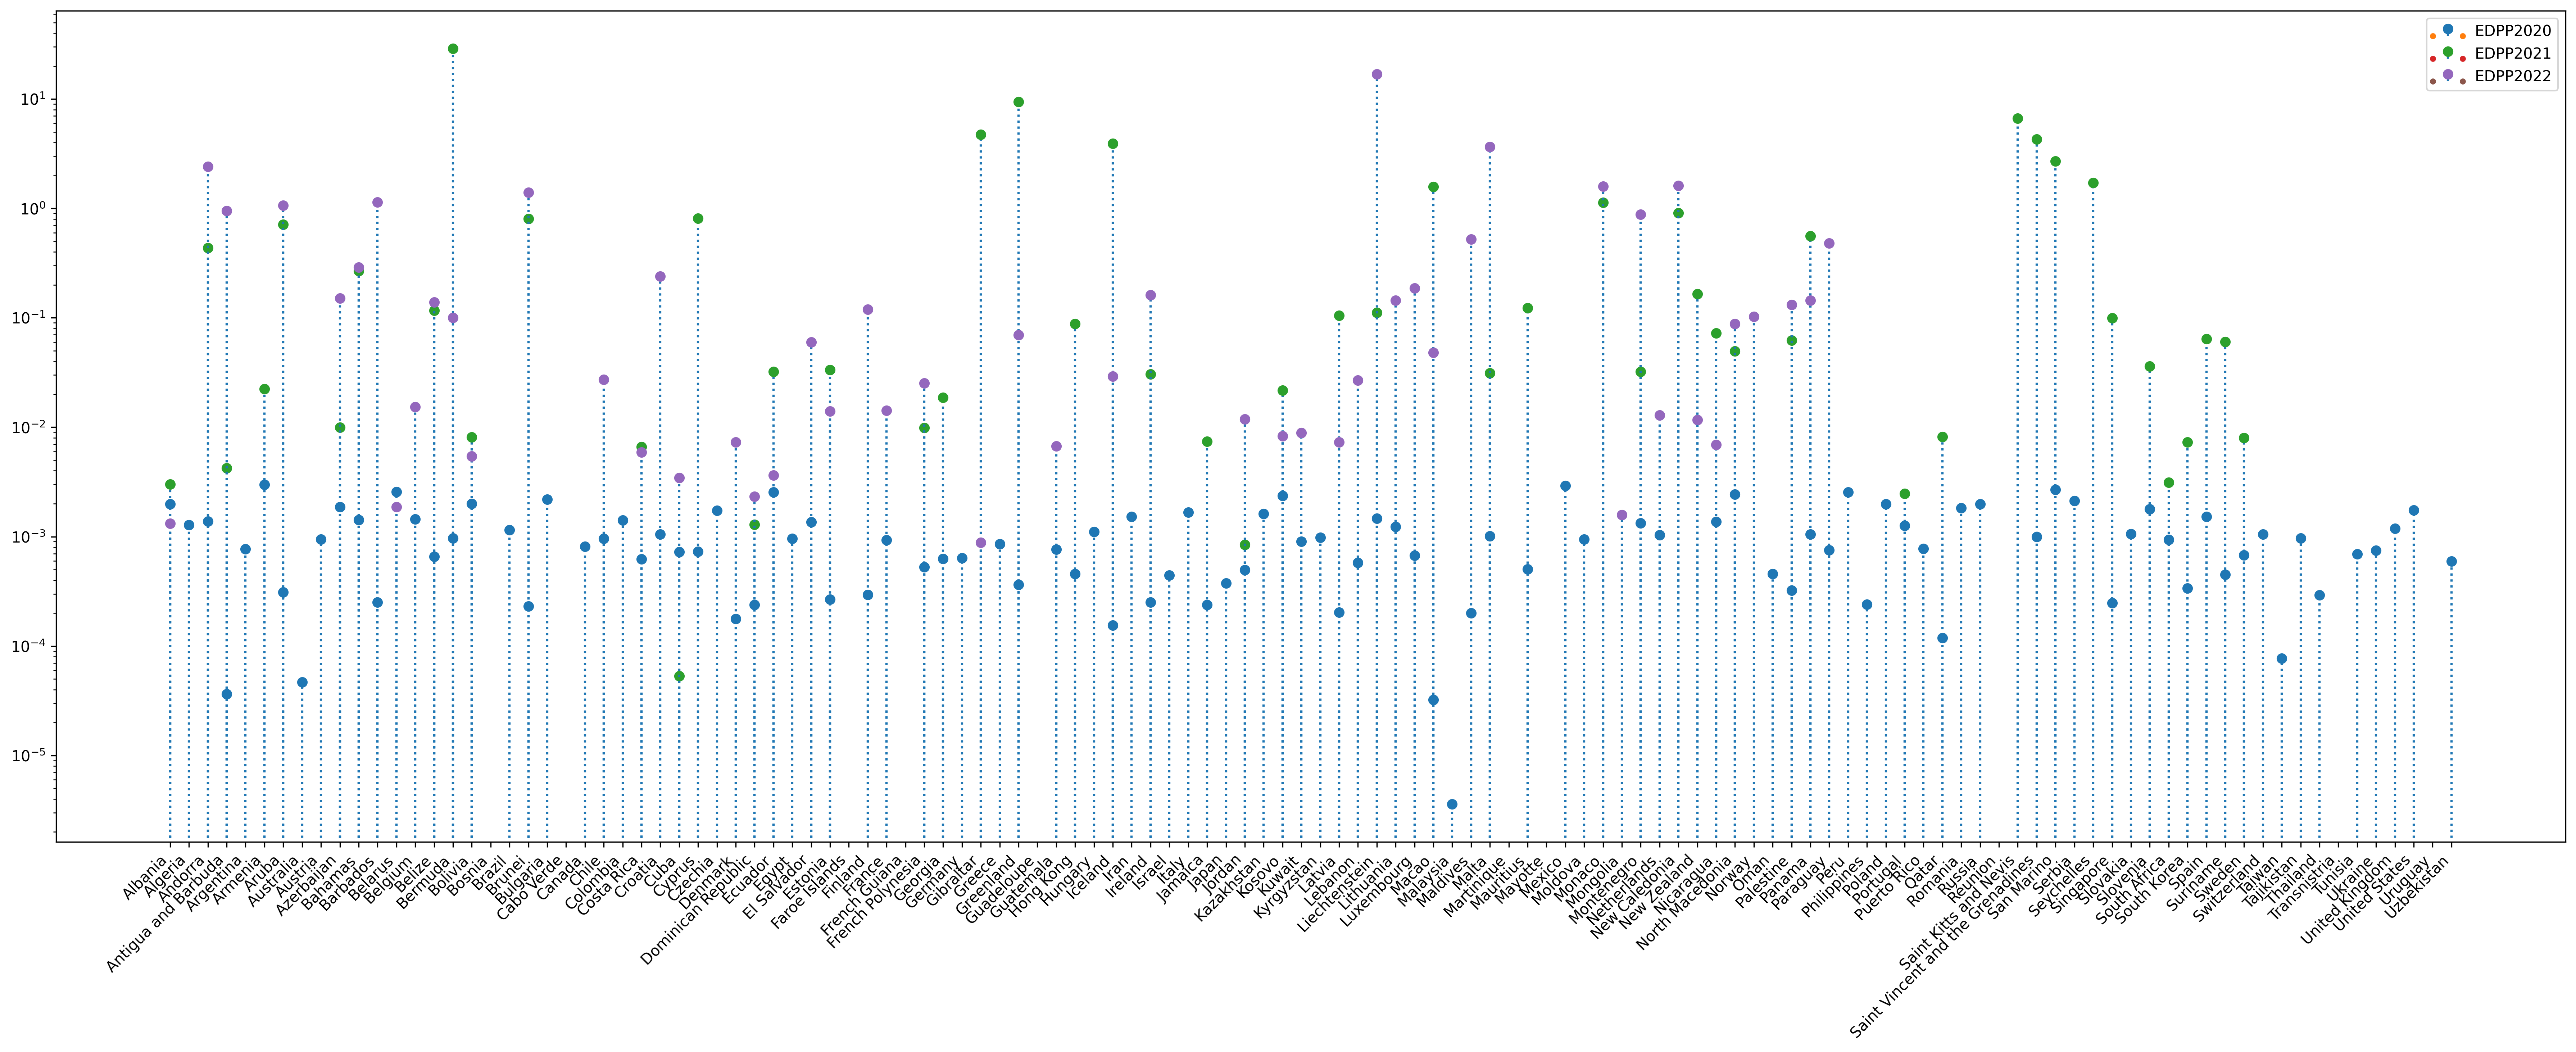

In [62]:
plt.figure(figsize=(30, 10), dpi=300)
plt.stem(newDF.country, newDF.EDPP2020, 'r', linefmt=':', markerfmt='o', basefmt='.', label='EDPP2020')
plt.stem(newDF.country, newDF.EDPP2021, 'g', linefmt=':', markerfmt='o', basefmt='.', label='EDPP2021')
plt.stem(newDF.country, newDF.EDPP2022, 'b', linefmt=':', markerfmt='o', basefmt='.', label='EDPP2022')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.show()

# 2. Plot the total deaths for any select country vs time.  Example of time is 2015.5 for July,2015, 2016.0 for the first week of 2016.  